In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)   

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pylab as plt
from IPython import display

import grafica as gr

# Ajustar el tamaño predeterminado de las figuras
plt.rcParams['figure.figsize'] = [4,3]

### Ejemplos de la función AND

In [4]:
# Ejemplos de entrada de la función AND
X = np.array([[0,0], [0,1],[1,0],[1,1]])

#-- Respuesta esperada para cada ejemplo
T = np.array([0,0,0,1])
T=2*T-1

In [5]:
#X=2*X-1

### Prueba de dibujo

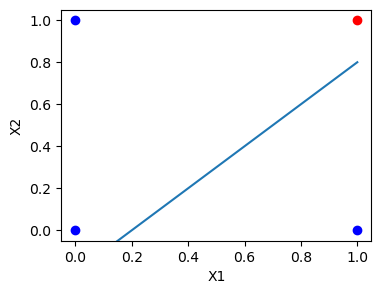

In [7]:
# -- PESOS INICIALES - Determinan la ubicación de la recta
W = np.array([-1.0, 1.0])
b = 0.2

res= gr.dibuPtosRecta(X,T, W, b, ['X1','X2'])

### Hiperparámetros del perceptrón

In [9]:
MAX_ITE = 100
alfa = 0.1

### Entrenamiento de la neurona sigmoide

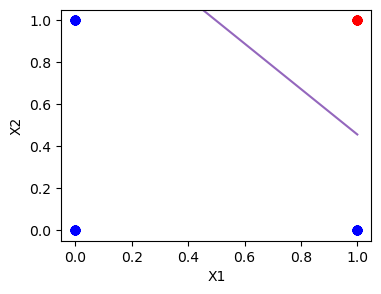

In [11]:
plt.clf()
nIn = X.shape[1]  # cantidad de pesos de entrada sin contar el sesgo

#--- Los pesos iniciales son aleatorios
W = np.array(np.random.uniform(-0.5, 0.5, size=nIn))
b = np.random.uniform(-0.5, 0.5)

#--- al finalizar ERRORES debe contener la cantidad de cambios realizados en c/iteración ---
errores = []

# --- titulos y ph se utilizan sólo para dibujar ---
titulos = ['X1', 'X2']
ph=0  # es el manejador de la recta en el dibujo


#-- Ingresar los ejemplos de a uno hasta que la diferencia de  
#   2 errores consecutivos sea inferior a cierta COTA

ite = 0
COTA = 10e-03

ErrorAct = 1
ErrorAnt = 2
while (ite < MAX_ITE) and (np.abs(ErrorAnt - ErrorAct)>COTA):
    ErrorAnt = ErrorAct       
    sumaErrores=0
    
    # ingresar los ejemplos de a uno
    for e in range(len(T)):
        
        neta = W[0]*X[e,0] + W[1]*X[e,1] + b
        
        #Y = 1 / (1+np.exp(-neta))
        Y = 2 / (1+np.exp(-2*neta)) - 1
        
        errorEj = (T[e] - Y)
        
        #derivada = Y * ( 1 - Y )
        derivada = 1-Y*Y
        
        W[0] = W[0] + alfa * errorEj * derivada * X[e,0]
        W[1] = W[1] + alfa * errorEj * derivada * X[e,1]
        b = b + alfa * errorEj * derivada * 1  # x0=1 siempre
            
        sumaErrores = sumaErrores + errorEj * errorEj
        
    ErrorAct = sumaErrores / len(T)    
    errores.append(ErrorAct)
    ite = ite + 1
            
    ph = gr.dibuPtosRecta(X,T, W, b, ['X1','X2'], ph)        


### Pesos obtenidos luego del entrenamiento

In [13]:
print("W = ", W)
print("b = ", b)

W =  [0.98360791 0.90885   ]
b =  -1.397996708395018


### Cantidad de errores por iteración

<Figure size 400x300 with 0 Axes>

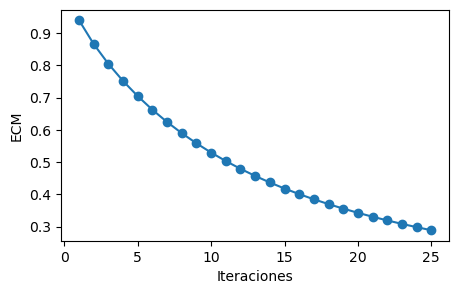

In [15]:
plt.clf()
plt.figure(figsize=(5,3))
plt.plot(range(1, len(errores) + 1), errores, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('ECM')
plt.show()

In [16]:
print(errores[len(errores)-5:])

[0.33086638987009676, 0.31944959680562435, 0.3087189247174853, 0.298615306670039, 0.2890863984890726]
